In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Step 1: Generate Synthetic Sales Data
def generate_sales_data():
    np.random.seed(42)
    dates = pd.date_range(start='2023-01-01', end='2023-12-31')
    num_records = len(dates) * 5  # 5 transactions per day on average

    data = {
        'Date': np.random.choice(dates, num_records),
        'Product': np.random.choice(['Product A', 'Product B', 'Product C', 'Product D', 'Product E'], num_records),
        'Category': np.random.choice(['Electronics', 'Clothing', 'Home Decor', 'Groceries', 'Books'], num_records),
        'Quantity': np.random.randint(1, 10, num_records),
        'Price': np.random.randint(10, 100, num_records),
    }

    df = pd.DataFrame(data)
    df['Total_Sales'] = df['Quantity'] * df['Price']
    return df

In [ ]:
# Step 2: Load or Generate Data
try:
    sales_data = pd.read_csv('sales_data.csv')  # Replace with your dataset path
except FileNotFoundError:
    sales_data = generate_sales_data()

In [ ]:
# Step 3: Data Cleaning and Transformation
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['Month'] = sales_data['Date'].dt.month_name()

In [ ]:
# Step 4: Exploratory Data Analysis
print("Dataset Overview:")
print(sales_data.head())

Dataset Overview:
        Date    Product     Category  Quantity  Price  Total_Sales      Month
0 2023-04-13  Product A        Books         7     50          350      April
1 2023-12-15  Product A  Electronics         9     53          477   December
2 2023-09-28  Product E        Books         4     73          292  September
3 2023-04-17  Product A     Clothing         8     40          320      April
4 2023-03-13  Product E     Clothing         3     56          168      March


In [ ]:
# Top Products by Total Sales
top_products = sales_data.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)
print("\nTop Products by Total Sales:")
print(top_products)


Top Products by Total Sales:
Product
Product D    107934
Product E    100642
Product A     99572
Product C     95092
Product B     92120
Name: Total_Sales, dtype: int64


In [ ]:

# Monthly Sales Trend
monthly_sales = sales_data.groupby('Month')['Total_Sales'].sum().sort_index()
print("\nMonthly Sales Trend:")
print(monthly_sales)


Monthly Sales Trend:
Month
April        40682
August       46159
December     39746
February     40198
January      43414
July         40342
June         47029
March        34345
May          42675
November     38501
October      43294
September    38975
Name: Total_Sales, dtype: int64


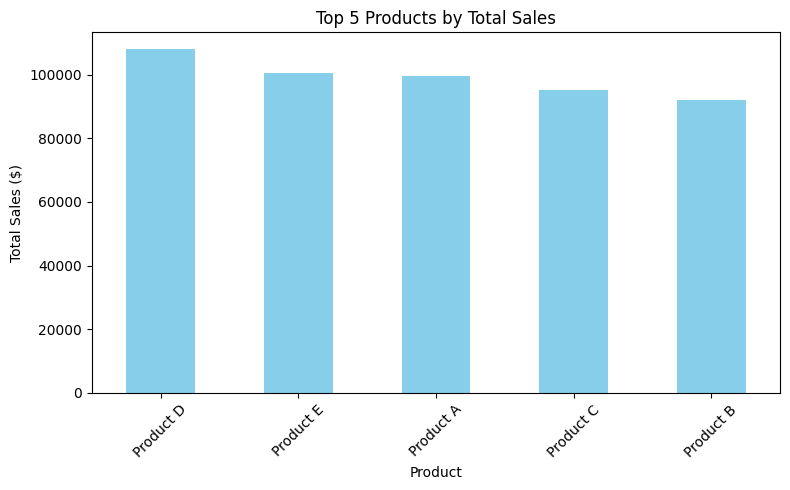

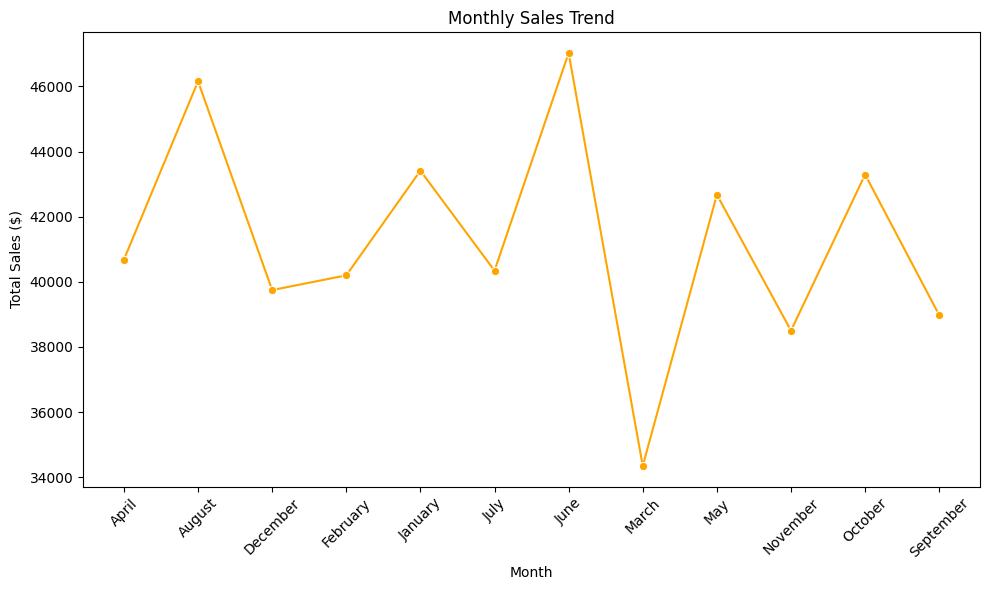

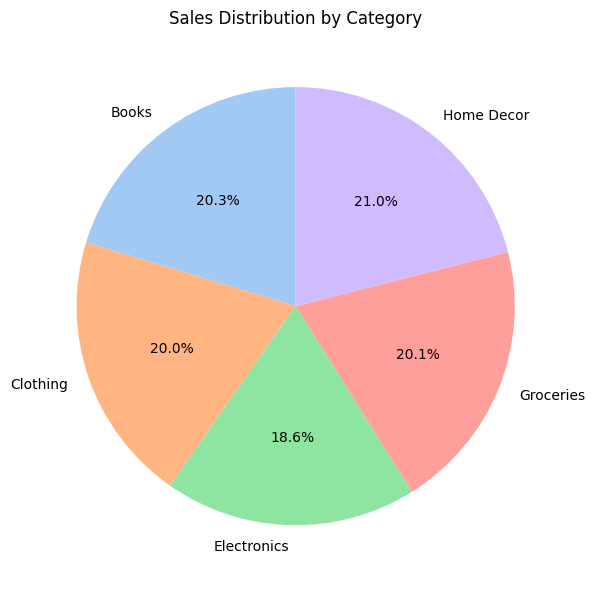

In [ ]:
# Step 5: Visualization
# 1. Top 5 Products by Sales
plt.figure(figsize=(8, 5))
top_products.head(5).plot(kind='bar', color='skyblue')
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Monthly Sales Trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Sales Distribution by Category
category_sales = sales_data.groupby('Category')['Total_Sales'].sum()
plt.figure(figsize=(8, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
# Step 6: Save the Processed Data
sales_data.to_csv('processed_sales_data.csv', index=False)
print("\nProcessed sales data saved as 'processed_sales_data.csv'.")


Processed sales data saved as 'processed_sales_data.csv'.
